In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"ML_cars.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
columns = ['symboling','fueltype', 'aspiration',
'doornumber', 'carlength', 'carwidth', 
'carheight', 'curbweight', 'enginetype', 
'cylindernumber', 'enginesize', 'fuelsystem', 
'horsepower', 'peakrpm', 'citympg', 'highwaympg']

In [6]:
X = df[columns]
y = df["price"]

In [7]:
categoricas = X.select_dtypes(exclude=np.number).columns
df_encoded = pd.get_dummies(X[categoricas])

In [8]:
X.drop(categoricas,axis=1, inplace=True)
X = pd.concat([X, df_encoded], axis=1)
X

C:\Users\ZeeD\AppData\Local\Temp\ipykernel_8420\1184861715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(categoricas,axis=1, inplace=True)


,symboling,carlength,carwidth,carheight,curbweight,enginesize,horsepower,peakrpm,citympg,highwaympg,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,168.8,64.1,48.8,2548,130,111,5000,21,27,...,False,False,False,False,False,False,False,True,False,False
1,3,168.8,64.1,48.8,2548,130,111,5000,21,27,...,False,False,False,False,False,False,False,True,False,False
2,1,171.2,65.5,52.4,2823,152,154,5000,19,26,...,False,False,False,False,False,False,False,True,False,False
3,2,176.6,66.2,54.3,2337,109,102,5500,24,30,...,False,False,False,False,False,False,False,True,False,False
4,2,176.6,66.4,54.3,2824,136,115,5500,18,22,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,188.8,68.9,55.5,2952,141,114,5400,23,28,...,False,False,False,False,False,False,False,True,False,False
201,-1,188.8,68.8,55.5,3049,141,160,5300,19,25,...,False,False,False,False,False,False,False,True,False,False
202,-1,188.8,68.9,55.5,3012,173,134,5500,18,23,...,False,False,False,False,False,False,False,True,False,False
203,-1,188.8,68.9,55.5,3217,145,106,4800,26,27,...,False,False,False,False,False,True,False,False,False,False


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=70)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 9663478.679825874
Root Mean Squared Error (RMSE): 3108.613626655116
R-squared (R2): 0.8407808560144355


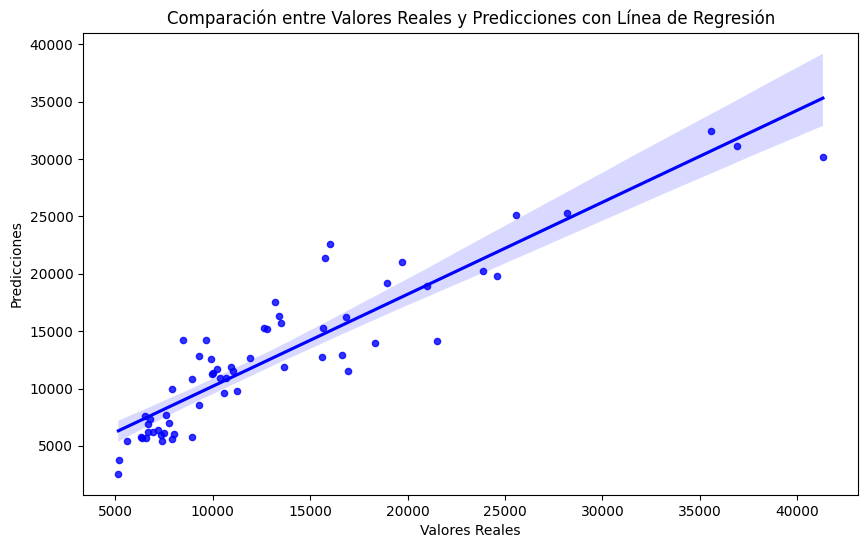

In [66]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

plt.figure(figsize=(10, 6))
sns.regplot(x='Actual', y='Predicted', data=results, color='blue', scatter_kws={'s': 20})
plt.title('Comparación entre Valores Reales y Predicciones con Línea de Regresión')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()

In [67]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=70)

knn_model = KNeighborsRegressor(n_neighbors=1)  
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("Métricas para modelo k-NN:")
print(f"Mean Squared Error (MSE): {mse_knn}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn}")
print(f"R-squared (R2): {r2_knn}")

Métricas para modelo k-NN:
Mean Squared Error (MSE): 8296963.866935484
Root Mean Squared Error (RMSE): 2880.4450813954923
R-squared (R2): 0.8632960729420857


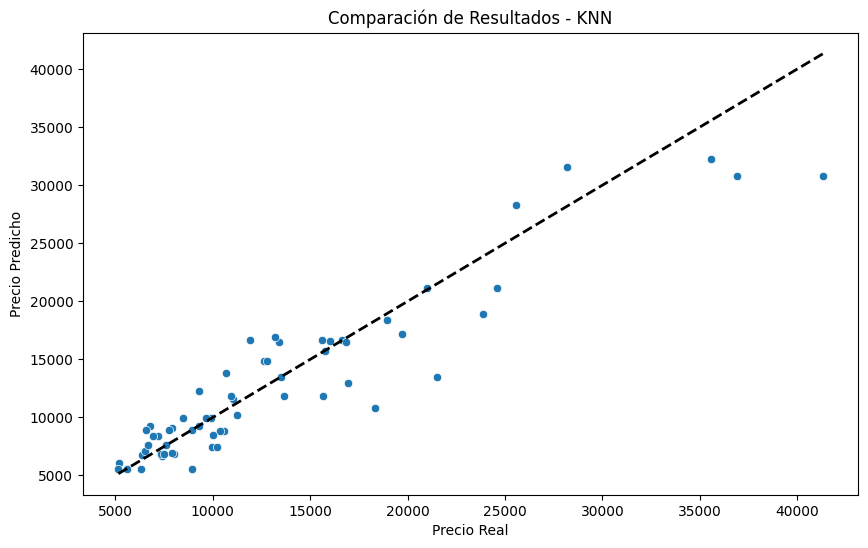

In [68]:
results_knn = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn})


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results_knn)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.title('Comparación de Resultados - KNN')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.show()

In [69]:
from sklearn.tree import DecisionTreeRegressor


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=70)
tree_model = DecisionTreeRegressor(max_depth=5, min_samples_split=3, min_samples_leaf=1, random_state=70)  # Puedes ajustar los parámetros según sea necesario
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Métricas para modelo de Árbol de Decisión:")
print(f"Mean Squared Error (MSE): {mse_tree}")
print(f"Root Mean Squared Error (RMSE): {rmse_tree}")
print(f"R-squared (R2): {r2_tree}")

Métricas para modelo de Árbol de Decisión:
Mean Squared Error (MSE): 8316544.486327548
Root Mean Squared Error (RMSE): 2883.8419662539673
R-squared (R2): 0.8629734552221522


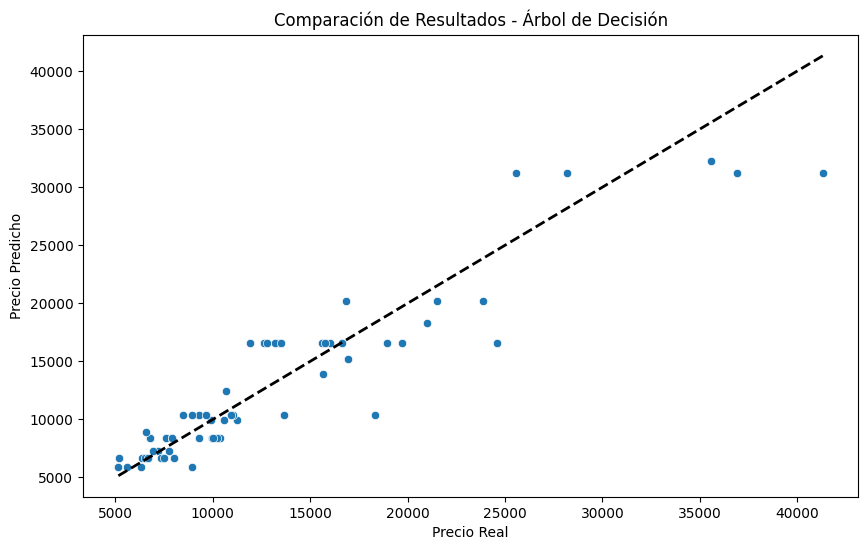

In [71]:
results_tree = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_tree})

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results_tree)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Línea de referencia
plt.title('Comparación de Resultados - Árbol de Decisión')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.show()